In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

En [primer lugar](https://dartbrains.org/content/Resampling_Statistics.html), asumamos una población con una distribución normal.

Supondremos que hay 10,000 participantes en la población.

In [ ]:
#np.random.seed(55) ##44

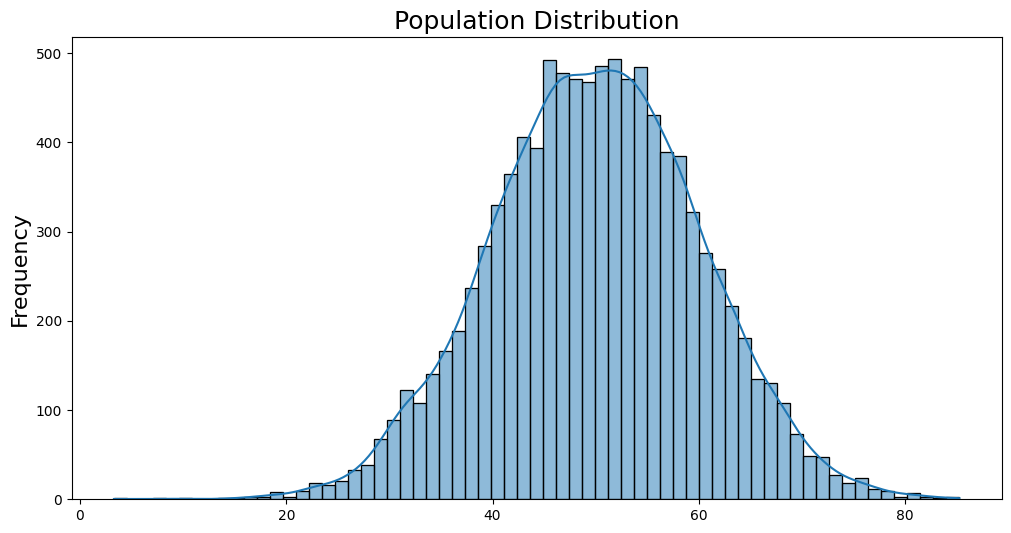

In [2]:
mean = 50
std = 10
population_n = 10_000
population = mean + np.random.randn(population_n)*std

plt.figure(figsize=(12, 6))
sns.histplot(population, kde=True, label='Population')
plt.title('Population Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [3]:
print(f'Population Mean: {np.mean(population):.3}')
print(f'Population Std: {np.std(population):.3}')

Population Mean: 50.0
Population Std: 10.1


Ahora, hagamos un experimento en el que tomamos una muestra aleatoria de **`20`** participantes de la población.

Se puede observar que la **`media`** y la **`desviación estándar`** de esta distribución son bastante similares a las de la población, aunque no estemos tomando una muestra completa de la distribución.

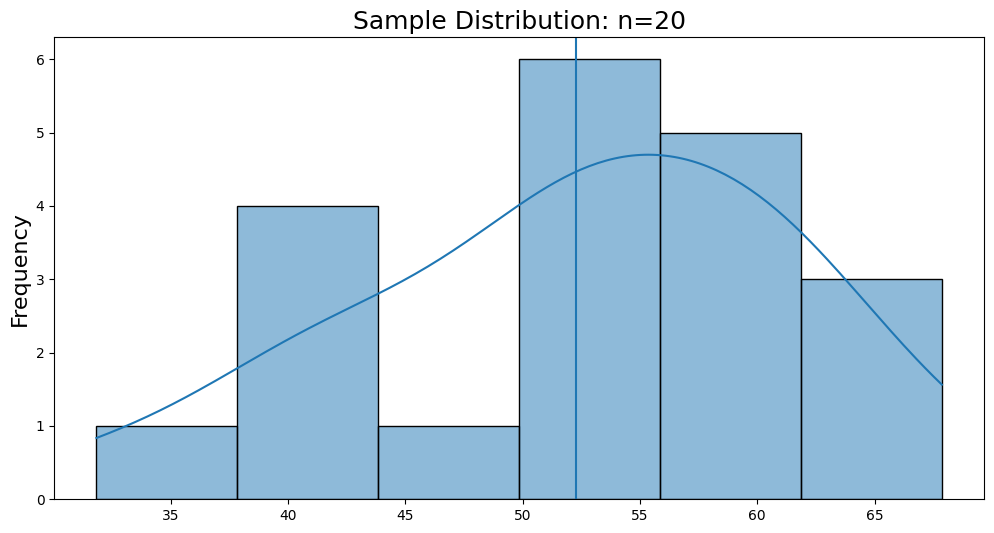

In [4]:
sample_n = 20
sample = np.random.choice(population, size=sample_n, replace=False)

plt.figure(figsize=(12, 6))
sns.histplot(sample, kde=True, label='Single Sample')
plt.axvline(x=np.mean(sample), ymin=0, ymax=1, linestyle='-')
plt.title(f'Sample Distribution: n={sample_n}', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [5]:
print(f'Sample Mean: {np.mean(sample):.3}')
print(f'Sample Std: {np.std(sample):.3}')

Sample Mean: 52.3
Sample Std: 8.96


Ahora estimemos la **`media`** de esta muestra mediante **bootstrapping** **`5,000 veces`** para estimar nuestra certeza en esta estimación a partir de nuestra pequeña muestra única.

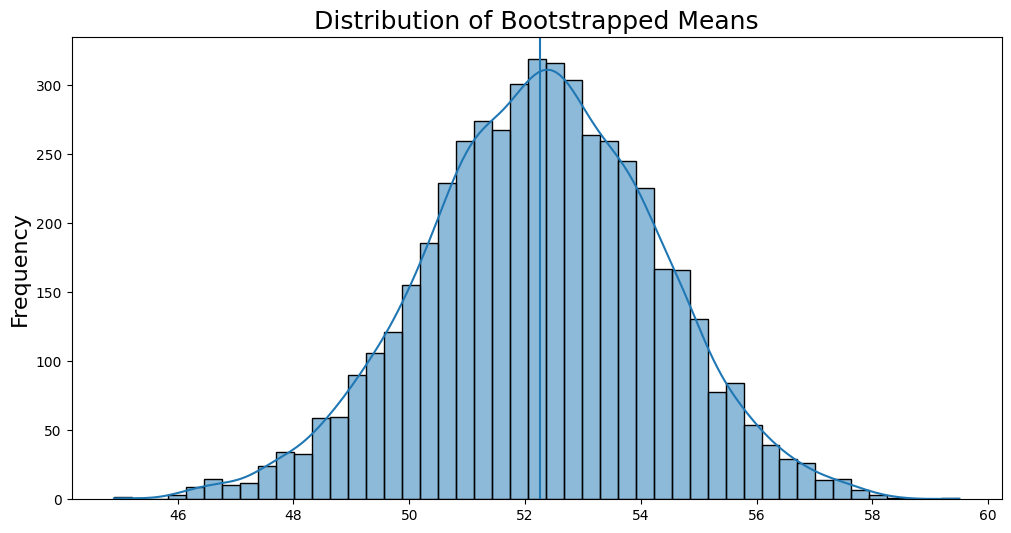

In [6]:
n_bootstrap = 5000
sample_n = 20

bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_means.append(np.mean(np.random.choice(sample, size=sample_n, replace=True)))

bootstrap_means = np.array(bootstrap_means)

plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_means, kde=True, label='Bootstrap')
plt.axvline(x=np.mean(bootstrap_means), ymin=0, ymax=1, linestyle='-')
plt.title('Distribution of Bootstrapped Means', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [7]:
print(f'Bootstrapped Mean: {np.mean(bootstrap_means):.3}')
print(f'Bootstrapped Std: {np.std(bootstrap_means):.3}')

Bootstrapped Mean: 52.3
Bootstrapped Std: 2.01


A partir de esta simulación, podemos ver que la `media de los bootstraps` es igual a la `media original de la muestra`.

**`¿Qué grado de confianza tenemos en la precisión de nuestra media estimada?`** En otras palabras, si revisáramos las 5,000 submuestras, ¿cuántas de ellas estarían cerca de 50,1? Podemos definir un `intervalo de confianz`a para describir nuestra incertidumbre en la estimación.

Por ejemplo, podemos utilizar el `método percentil` para demostrar el rango del parámetro estimado en el **95%** de nuestras muestras. Para ello, calculamos los cuantiles superior e inferior de nuestras estimaciones de bootstrap centradas en el 50 % (es decir, el 2.5 % y el 97.5 %).

Bootstrapped Mean: 52.3
95% Confidence Intervals: [48.1, 56.2]


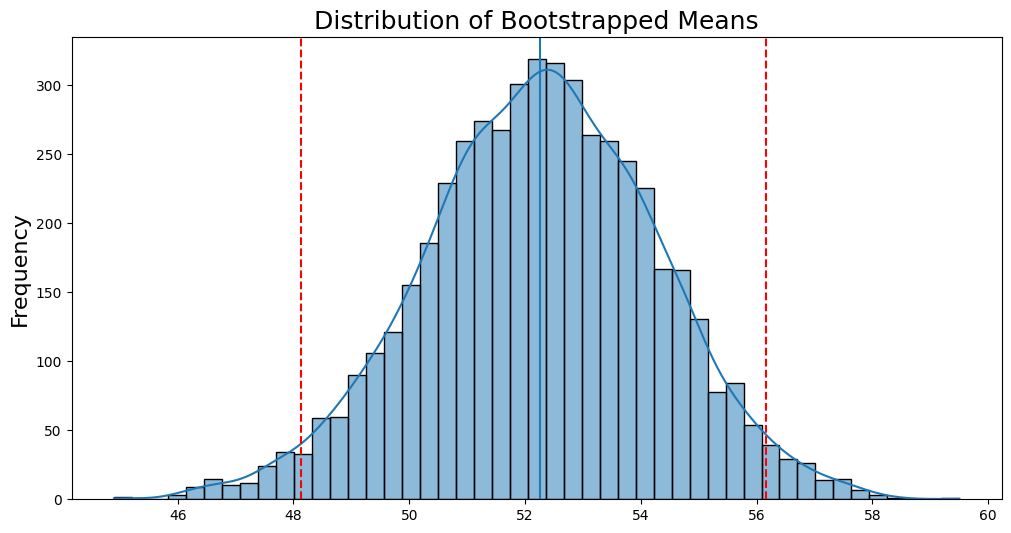

In [8]:
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f'Bootstrapped Mean: {np.mean(bootstrap_means):.3}')
print(f'95% Confidence Intervals: [{lower_bound:.3}, {upper_bound:.3}]')

# Graficamos la distribucion muestral de la media
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_means, kde=True, label='Bootstrap')
plt.axvline(x=np.mean(bootstrap_means), ymin=0, ymax=1, linestyle='-')
plt.title('Distribution of Bootstrapped Means', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

# Graficamos los intervalos de confianza
plt.axvline(x=lower_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=upper_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.show()

El método percentil revela que el 95 % de nuestras muestras bootstrap se encuentran entre el intervalo [47,4, 55,6].

Aunque el método percentil es fácil de calcular y intuitivo de entender, podria presentar algunos problemas:

1. Si la muestra original era pequeña y no representativa de la población, el intervalo de confianza puede estar sesgado y ser demasiado estrecho.

2. Si la distribución bootstrapped no es simétrica y está sesgada, los intervalos de confianza basados en percentiles no reflejarán con precisión la distribución.

---

Ahora veamos cómo se compara el bootstrap con lo que obtendríamos si hubiéramos realizado experimentos independientes reales.

Simulemos `1,000 experimentos` en los que tomamos `1,000 muestras` aleatorias de participantes independientes de la población y examinamos la distribución de las `medias` de estos experimentos independientes.

Bootstrapped Mean: 49.9
95% Confidence Intervals: [45.4, 54.2]


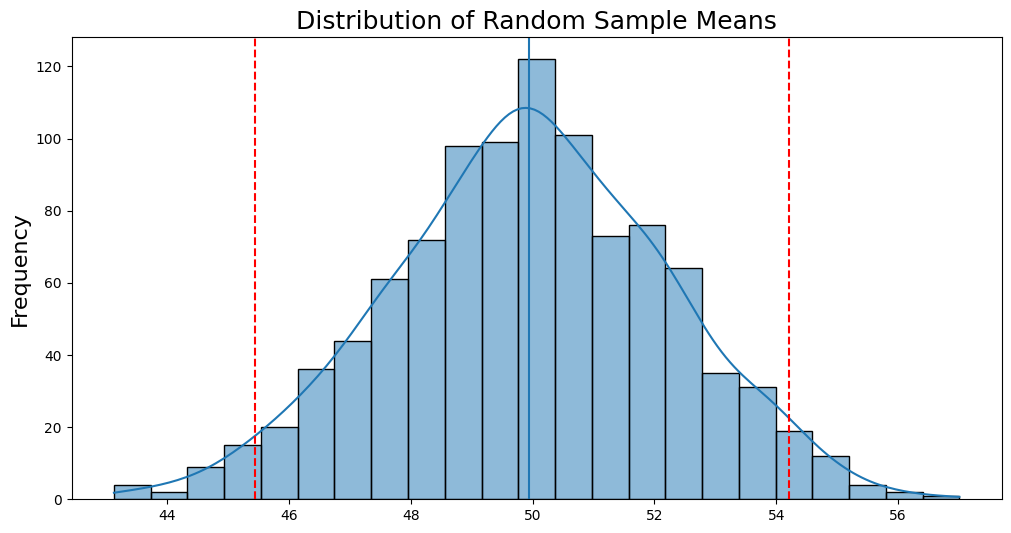

In [9]:
# Tomamos 1,000 medias muestrales de 1,000 muestras cada uno.
n_samples = 1000

sample_means = []
for b in range(n_samples):
    sample_means.append(np.mean(np.random.choice(population, size=sample_n, replace=False)))

sample_means = np.array(sample_means)

# Calculamos los intervalos de confianza del 95%
lower_bound = np.percentile(sample_means, 2.5)
upper_bound = np.percentile(sample_means, 97.5)

print(f'Bootstrapped Mean: {np.mean(sample_means):.3}')
print(f'95% Confidence Intervals: [{lower_bound:.3}, {upper_bound:.3}]')

# Graficamos la distribucion muestral de la media y los intervalos de confianza
plt.figure(figsize=(12, 6))

sns.histplot(sample_means, kde=True, label='Random Samples')
plt.axvline(x=np.mean(sample_means), ymin=0, ymax=1, linestyle='-')
plt.title('Distribution of Random Sample Means', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=lower_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=upper_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.show()

Vemos que la `media` se acerca más a la `media poblacional`, y nuestra certeza es aproximada a la que estimamos a partir del bootstrapping de una sola muestra.

<br>

Por último, comparemos la distribución bootstrapped de 20 muestras con la distribucion muestral de la media de 1000 muestras aleatorias.

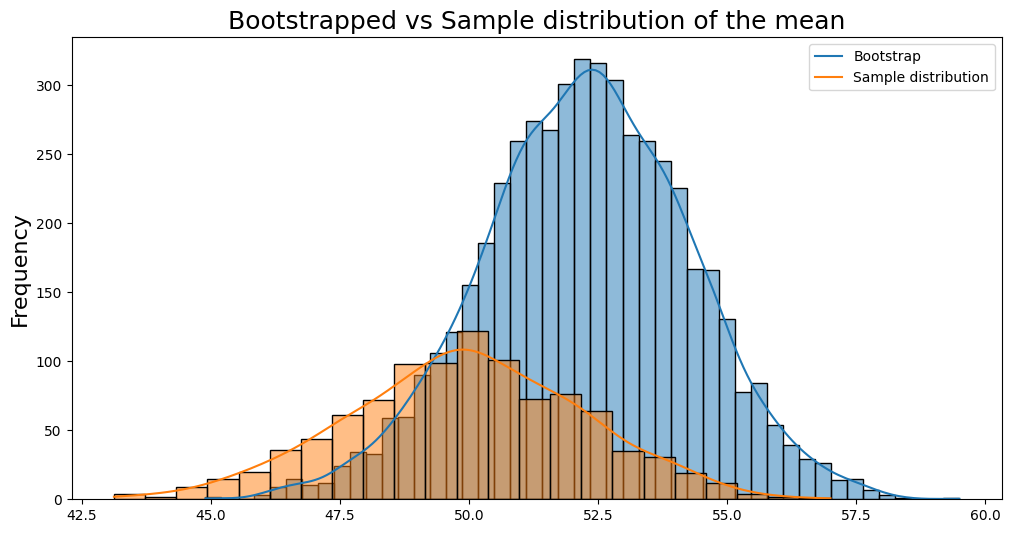

In [10]:
plt.figure(figsize=(12, 6))

sns.histplot(bootstrap_means, kde=True, label='Bootstrap')
sns.histplot(sample_means, kde=True, label='Random Samples')

plt.title('Bootstrapped vs Sample distribution of the mean', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['Bootstrap', 'Sample distribution'])
plt.show()

Esta técnica ciertamente no es perfecta, pero es muy impresionante lo bien que podemos estimar la precisión de una estadística a nivel poblacional a partir de un solo experimento pequeño utilizando el bootstrapping.

Aunque nuestro ejemplo se centra en estimar la media de una población, este enfoque debería funcionar para muchos tipos diferentes de estimadores.



---

# EJERCICIO

Es probable que la distribución de una estadística muestral como la **media** sea más regular y en forma de campana que la distribución de los propios datos. Esto es tanto más cierto cuanto mayor es la muestra en la que se basa la estadística. Además, cuanto mayor sea la muestra, más estrecha será la distribución de la estadística muestral.

**Esto se ilustra en un ejemplo en el que se utilizan los ingresos anuales de los solicitantes de préstamos a Lending Club**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
LOANS_INCOME_CSV = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/loans_income.csv"

In [13]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

In [14]:
print("Size: ", loans_income.shape)
loans_income.head()

Size:  (50000,)


,x
0,67000
1,52000
2,100000
3,78762
4,37041


Los principales paquetes de Python no proporcionan implementaciones del enfoque **bootstrap**. Se puede implementar utilizando el método **`resample`** de la libreria **`scikit-learn`**:

In [15]:
from sklearn.utils import resample

 Dada la estimación original de la **mediana** es de

In [16]:
Real_median = loans_income.median()
print(f'original: {Real_median}')

original: 62000.0


De la libreria `sklearn`, Utiliza la funcion [resample](https://) para extraer, de nuestro conjunto de datos `loans_income`, `1,000` medianas muestrales con reemplazo del maximo numero de muestras posibles.

In [18]:
n_bootstrap = 1000
boot_medians = []

for _ in range(n_bootstrap):
    boot_sample = resample(loans_income, replace=True)
    boot_medians.append(boot_sample.median())

boot_medians = np.array(boot_medians)

Posteriormente mide el sesgo (**bias**) que tiene el estimador de la mediana respecto a la mediana original.

Recordemos la definicion de bias:
$$
bias = E[\hat \theta] - \theta
$$

In [19]:
bias = np.mean(boot_medians) - Real_median
print(f'Bias: {bias:.3}')

Bias: -67.0


Ademas, mida el **error estandar** de dicho estimador:

In [20]:
std_error = np.std(boot_medians)
print(f'Standard Error: {std_error:.3}')

Standard Error: 2.07e+02




 La distribución bootstrap indica que la estimación tiene un **sesgo** (bias) de aproximadamente $\approx$ -\$70 y un **error estándar** de $\approx$ \$209.

 Los resultados variarán ligeramente entre ejecuciones consecutivas del algoritmo.

Ahora, utilicemos una metologia similar a la anterior pero para el estimador para el estimador de la **media**:

In [21]:
np.random.seed(seed=3)

* Asume que el conjunto de datos original `loans_income` es nuestra poblacion.

Tenemos como media real:

In [22]:
print("media original: ", loans_income.mean())

media original:  68760.51844


* Genera una muestra aleatoria (puedes utilizar la funcion `resample`) sin reemplazo de `20 muestras`. Esta sera considerada nuestra unica muestra.

In [23]:
single_sample = resample(loans_income, n_samples=20, replace=False)
print(f'Single Sample Size: {single_sample.shape}')
print(f'Single Sample Mean: {np.mean(single_sample):.3}')

Single Sample Size: (20,)
Single Sample Mean: 5.57e+04


* Ahora utilicemos el bootstrap , simulemos `500 experimentos` en los que tomamos todas las muestras aleatorias de la población y generamos la distribución muestral de las `medias`, Halle los intervalos de confianza del `90%` y grafique la distribucion muestral mostrando la ubicacion de la media de los intervalos de confianza.

Bootstrapped Mean: 6.88e+04
90% Confidence Intervals: [6.85e+04, 6.9e+04]


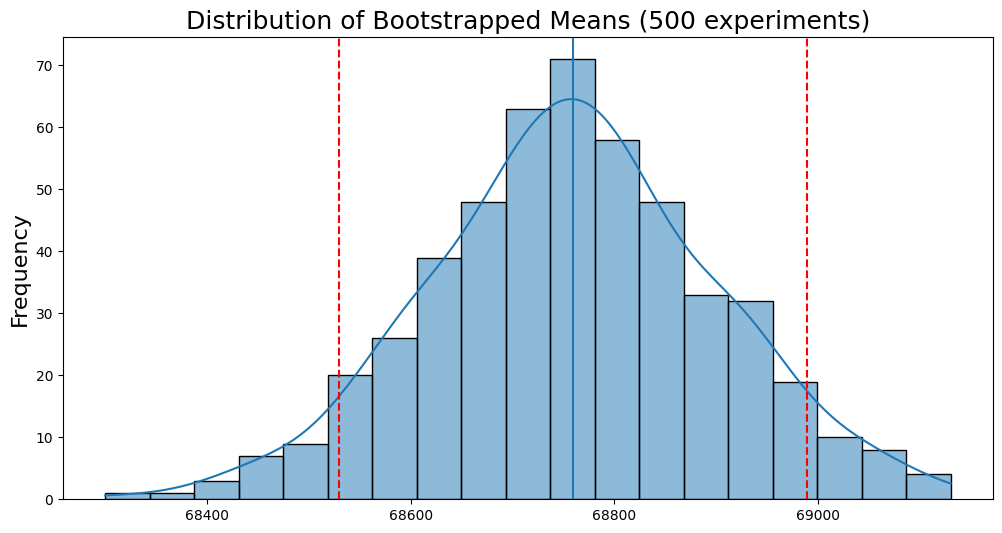

In [24]:
n_experiments = 500
bootstrapped_means = []

for _ in range(n_experiments):
    bootstrap_sample = resample(loans_income, replace=True)
    bootstrapped_means.append(bootstrap_sample.mean())

bootstrapped_means = np.array(bootstrapped_means)

# Calculate the 90% confidence intervals
lower_bound = np.percentile(bootstrapped_means, 5)
upper_bound = np.percentile(bootstrapped_means, 95)

print(f'Bootstrapped Mean: {np.mean(bootstrapped_means):.3}')
print(f'90% Confidence Intervals: [{lower_bound:.3}, {upper_bound:.3}]')

# Plot the distribution of bootstrapped means and the confidence intervals
plt.figure(figsize=(12, 6))
sns.histplot(bootstrapped_means, kde=True, label='Bootstrap')
plt.axvline(x=np.mean(bootstrapped_means), ymin=0, ymax=1, linestyle='-')
plt.title('Distribution of Bootstrapped Means (500 experiments)', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

# Plot the confidence intervals
plt.axvline(x=lower_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=upper_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.show()

* Intente con muestreos aleatorios de mas de `20 muestras`, verifique a partir de que momento podemos tener resultados mas acertados.

Sample Size: 50
  Bootstrapped Mean: 6.92e+04
  Standard Error: 4.56e+03
  90% Confidence Intervals: [6.23e+04, 7.73e+04]
--------------------
Sample Size: 100
  Bootstrapped Mean: 6.87e+04
  Standard Error: 3.27e+03
  90% Confidence Intervals: [6.35e+04, 7.43e+04]
--------------------
Sample Size: 500
  Bootstrapped Mean: 6.87e+04
  Standard Error: 1.41e+03
  90% Confidence Intervals: [6.64e+04, 7.1e+04]
--------------------
Sample Size: 1000
  Bootstrapped Mean: 6.88e+04
  Standard Error: 1.03e+03
  90% Confidence Intervals: [6.7e+04, 7.04e+04]
--------------------


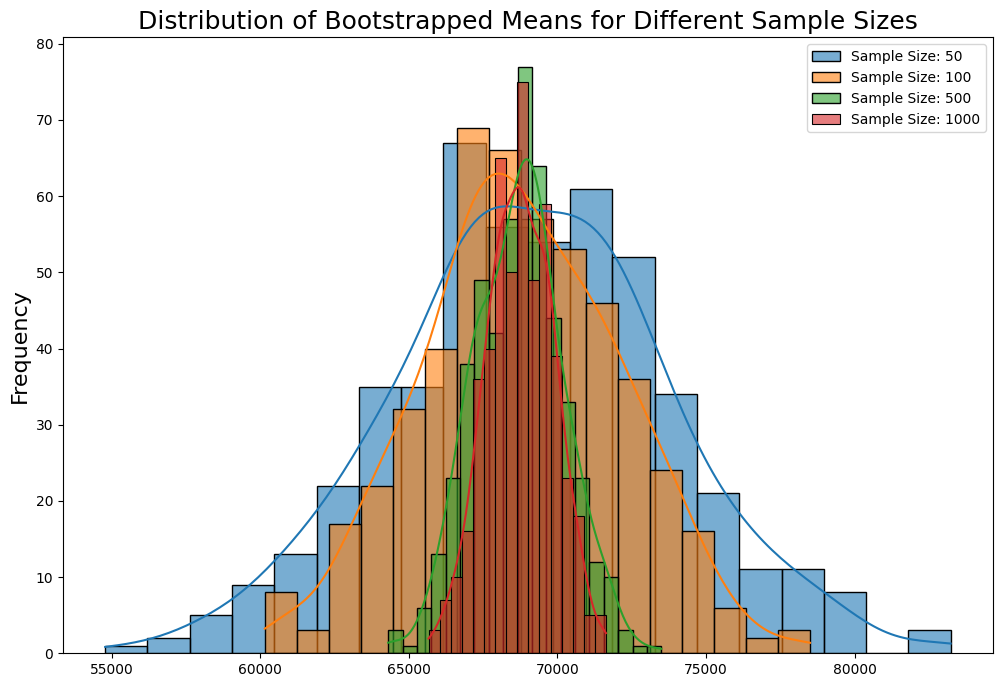

In [25]:
sample_sizes_to_test = [50, 100, 500, 1000]  # Example sample sizes to test
n_experiments = 500

results = {}

for sample_size in sample_sizes_to_test:
    bootstrapped_means = []
    for _ in range(n_experiments):
        bootstrap_sample = resample(loans_income, n_samples=sample_size, replace=True)
        bootstrapped_means.append(bootstrap_sample.mean())

    bootstrapped_means = np.array(bootstrapped_means)

    lower_bound = np.percentile(bootstrapped_means, 5)
    upper_bound = np.percentile(bootstrapped_means, 95)

    results[sample_size] = {
        'mean': np.mean(bootstrapped_means),
        'std_error': np.std(bootstrapped_means),
        'confidence_interval_90': (lower_bound, upper_bound)
    }

# Print the results for each sample size
for sample_size, data in results.items():
    print(f'Sample Size: {sample_size}')
    print(f'  Bootstrapped Mean: {data["mean"]:.3}')
    print(f'  Standard Error: {data["std_error"]:.3}')
    print(f'  90% Confidence Intervals: [{data["confidence_interval_90"][0]:.3}, {data["confidence_interval_90"][1]:.3}]')
    print("-" * 20)

# Optional: Visualize the distributions for different sample sizes
plt.figure(figsize=(12, 8))
for sample_size in sample_sizes_to_test:
    bootstrapped_means = []
    for _ in range(n_experiments):
        bootstrap_sample = resample(loans_income, n_samples=sample_size, replace=True)
        bootstrapped_means.append(bootstrap_sample.mean())
    sns.histplot(bootstrapped_means, kde=True, label=f'Sample Size: {sample_size}', alpha=0.6)

plt.title('Distribution of Bootstrapped Means for Different Sample Sizes', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.show()